#### 3D Surface plots
There are two different 3D-plots:
- Surface plot: It represent a three-dimentional dataset.It is used to visualize `cost functions` in ML & deep learning. Also it visualize `store or state value functions` in Reinforcement learning.
- Contour plot: It visualize 3D-plots into 2D space. Contour plots are widely used to visualize density in ML by projection from 3D to 2D space.

#### Surface plot
In latest release of matplotlib, Axes3D is used to render 3D plots. After importing Axes3D, keyword `projection=‘3d’` is used to enable 3D-plots. For Surface plot in 3D, we use method `plot_surface()` on axes.


#### meshgrid
In surface 3D plots, we use a numpy function called meshgrid(). It is used to create a rectangular grid out of two given one-dimentional array. `meshgrid()` function return two-dimentional arrays.


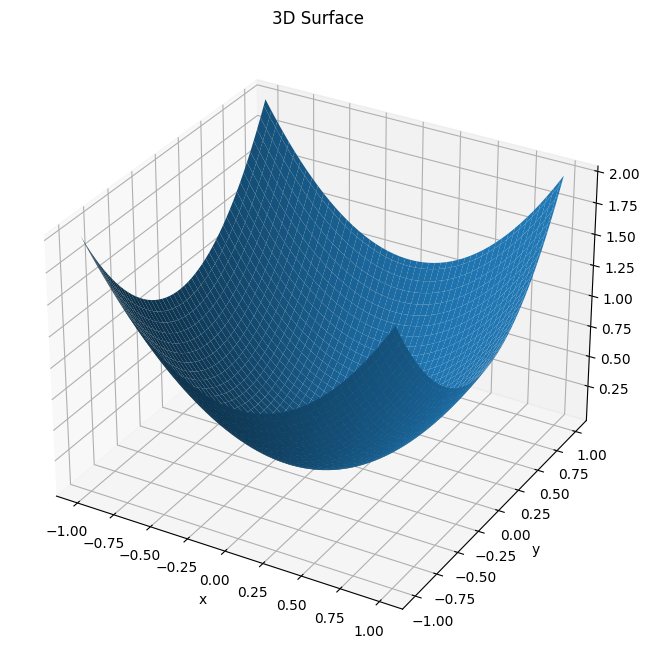

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create function z=f(x,y) = x^2 + y^2
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)

# Use meshgrid to expand one-dimentional array x and y to two-dimentional arrays 
# to be expanded to the area of intrest.
x,y = np.meshgrid(x, y)
z = x**2 + y**2

fig = plt.figure(figsize=(8,8)) 

# add_subplot(#row, #col, index, projection)
ax = fig.add_subplot(1, 1, 1, projection ='3d')

# Using plot_surface() method on Object ax, we plot 3D-Surfce for a z = f(x,y)
ax.plot_surface(x, y, z)
ax.set_title('3D Surface')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show() 

#### cmap
cmap stands for colormap. The idea of using colormap is to have a good representation of 3D for the datasets. Let's take a look at an example.

cmap in matplotlib are devided into multiple classes such as Sequential, Diverging etc.

Using which class of cmap, depends on how cmap represent the dataset in 3D plots. So best cmap can be found out by trying multiple options. Some of most used cmaps are, viridis, Spectral, RdBu, Reds etc. for full list of cmap, please refer to below link:

list of cmaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html.


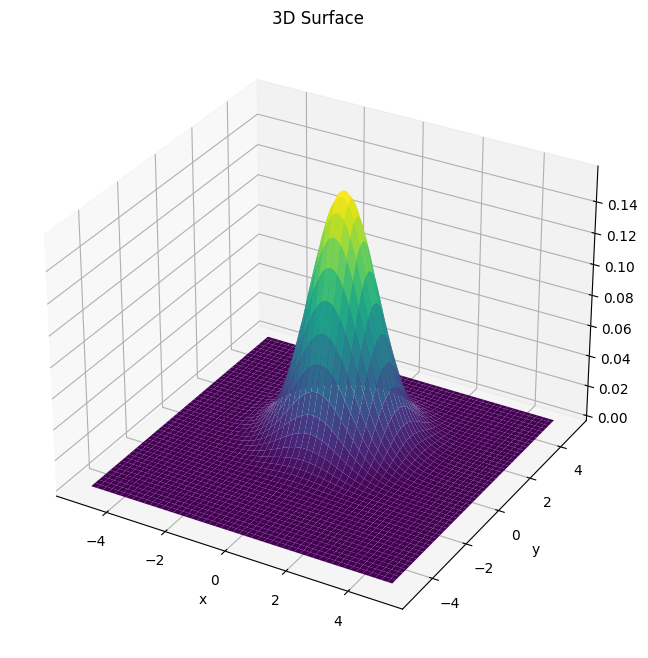

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# define a multivariate gaussian function
def multivariate_gaussian(x, mu, Sigma):
    """
    Return the multivariate normal (or Gaussian) distribution 
    for vector-valued random variable X=[X1,...,Xn]^T
    """
    # find dimention size
    n = mu.shape[0]
    
    # calculate deteminant and inversion of Sigma matrix
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    
    # calculate constant
    Nc = np.sqrt((2*np.pi)**n * Sigma_det)
    
    # calculate (x-mu)T.Sigma-1.(x-mu) using Numpy einsum method
    fac = np.einsum('...k,kl,...l->...', x-mu, Sigma_inv, x-mu)
    
    # get all together
    Nu = np.exp(-fac / 2) / Nc
    
    return Nu

# define X1 & X2 ranges
N = 200
X1 = np.linspace(-5, 5, N)
X2 = np.linspace(-5, 5, N)
X1, X2 = np.meshgrid(X1, X2)

# define mu & Sigma (2-dimentional)
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , 0.], [0.,  1.]])

# calculate X1 & X2 plane as input
x = np.empty(X1.shape + (2,))
x[:, :, 0] = X1
x[:, :, 1] = X2

# call multivariate_gaussian to calculate probability density function
Nu = multivariate_gaussian(x, mu, Sigma)

fig = plt.figure(figsize=(8,8)) 

# add_subplot(#row, #col, index, projection)
ax = fig.add_subplot(1, 1, 1, projection ='3d')

# Using plot_surface() method on Object ax, we plot 3D-Surfce for a z = f(x,y)
ax.plot_surface(X1, X2, Nu, cmap = cm.viridis)
ax.set_title('3D Surface')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show() 